# Setup

In [1]:
from pathlib import Path
import os

iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')
if iskaggle:
    !pip install -Uqq fastai
    path = Path('/kaggle/input/playground-series-s4e3')
else:
    import zipfile,kaggle
    path = Path('playground-series-s4e3')
    kaggle.api.competition_download_cli(str(path))
    zipfile.ZipFile(f'{path}.zip').extractall(path)

100%|███████████████████████████████████████████████████| 1.74M/1.74M [00:04<00:00, 404kB/s]

In [26]:
import pandas as pd
import numpy as np
import warnings

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# Loading the data

In [3]:
train_df = pd.read_csv(path/'train.csv')
test_df = pd.read_csv(path/'test.csv')
target_classes = ["Pastry", "Z_Scratch", "K_Scatch", "Stains", "Dirtiness", "Bumps", "Other_Faults"]
targets_df = train_df[target_classes]

In [4]:
train_df.head().T

,0,1,2,3,4
id,0.0000,1.0000,2.000000e+00,3.000000e+00,4.0000
X_Minimum,584.0000,808.0000,3.900000e+01,7.810000e+02,1540.0000
X_Maximum,590.0000,816.0000,1.920000e+02,7.890000e+02,1560.0000
Y_Minimum,909972.0000,728350.0000,2.212076e+06,3.353146e+06,618457.0000
Y_Maximum,909977.0000,728372.0000,2.212144e+06,3.353173e+06,618502.0000
Pixels_Areas,16.0000,433.0000,1.138800e+04,2.100000e+02,521.0000
X_Perimeter,8.0000,20.0000,7.050000e+02,1.600000e+01,72.0000
Y_Perimeter,5.0000,54.0000,4.200000e+02,2.900000e+01,67.0000
Sum_of_Luminosity,2274.0000,44478.0000,1.311391e+06,3.202000e+03,48231.0000
Minimum_of_Luminosity,113.0000,70.0000,2.900000e+01,1.140000e+02,82.0000


In [5]:
test_df.head().T

,0,1,2,3,4
id,1.921900e+04,19220.0000,19221.0000,19222.0000,19223.0000
X_Minimum,1.015000e+03,1257.0000,1358.0000,158.0000,559.0000
X_Maximum,1.033000e+03,1271.0000,1372.0000,168.0000,592.0000
Y_Minimum,3.826564e+06,419960.0000,117715.0000,232415.0000,544375.0000
Y_Maximum,3.826588e+06,419973.0000,117724.0000,232440.0000,544389.0000
Pixels_Areas,6.590000e+02,370.0000,289.0000,80.0000,140.0000
X_Perimeter,2.300000e+01,26.0000,36.0000,10.0000,19.0000
Y_Perimeter,4.600000e+01,28.0000,32.0000,11.0000,15.0000
Sum_of_Luminosity,6.235700e+04,39293.0000,29386.0000,8586.0000,15524.0000
Minimum_of_Luminosity,6.700000e+01,92.0000,101.0000,107.0000,103.0000


In [6]:
targets_df.head()

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1


# Understanding the data

This notebook has a good description of what the features and labels mean, as this is not discussed in the competition description on the website: https://www.kaggle.com/competitions/playground-series-s4e3/discussion/481015

The following is copied from there as a reference:

An explanation of each of the steel plate faults present in this Kaggle competition, reminding you that all these faults are superficial:

* Pastry: Pastry refers to small patches or irregularities on the surface of the steel plate, typically caused by imperfections in the manufacturing process or handling during transport. These imperfections can affect the surface smoothness and appearance of the steel plate.

* Z_Scratch: Z-scratches are narrow scratches or marks on the surface of the steel plate that run parallel to the rolling direction. Various factors, such as handling, machining, or contact with abrasive materials during production or transportation, can cause these scratches.

* K_Scratch: K-scratches are similar to Z-scratches but run perpendicular to the rolling direction. They can also be caused by handling, machining, or contact with abrasive materials during manufacturing or transportation processes.

* Stains: Stains refer to discolored or contaminated areas on the surface of the steel plate. These stains can result from various sources, such as rust, oil, grease, or other foreign substances that come into contact with the steel surface during processing, storage, or handling.

* Dirtiness: Dirtiness indicates the presence of dirt or particulate matter on the surface of the steel plate. This can include various types of debris or contaminants that accumulate during manufacturing, handling, or storage processes.

* Bumps: Bumps are raised or protruding areas on the surface of the steel plate. These can be caused by irregularities in the manufacturing process, such as uneven rolling or cooling, or by physical damage during handling or transportation.

* Other_Faults: This category likely encompasses a broader range of faults or defects not explicitly categorized in the other fault types listed. It could include various types of surface imperfections, irregularities, or abnormalities that affect the quality or usability of the steel plate.

Here are some further information about the features:

* The dataset "Steel Plates Faults" contains 27 features that describe each fault in detail. Here is an explanation of some of the features based on the information gathered from the search results:

Location Features:

* X_Minimum: The minimum x-coordinate of the fault.
* X_Maximum: The maximum x-coordinate of the fault.
* Y_Minimum: The minimum y-coordinate of the fault.
* Y_Maximum: The maximum y-coordinate of the fault.

Size Features:

* Pixels_Areas: Area of the fault in pixels.
* X_Perimeter: Perimeter along the x-axis of the fault.
* Y_Perimeter: Perimeter along the y-axis of the fault.

Luminosity Features:

* Sum_of_Luminosity: Sum of luminosity values in the fault area.
* Minimum_of_Luminosity: Minimum luminosity value in the fault area.
* Maximum_of_Luminosity: Maximum luminosity value in the fault area.

Material and Index Features:

* TypeOfSteel_A300: Type of steel (A300).
* TypeOfSteel_A400: Type of steel (A400).
* Steel_Plate_Thickness: Thickness of the steel plate.
* Edges_Index, Empty_Index, Square_Index, Outside_X_Index, Edges_X_Index, Edges_Y_Index, * Outside_Global_Index: Various index values related to edges and geometry.

Logarithmic Features:

* LogOfAreas: Logarithm of the area of the fault.
* Log_X_Index, Log_Y_Index: Logarithmic indices related to X and Y coordinates.

Statistical Features:

* Orientation_Index: Index describing orientation.
* Luminosity_Index: Index related to luminosity.
* SigmoidOfAreas: Sigmoid function applied to areas.

# Targets

Note that the overwhelming majority of of rows have one target, but there are a few with 2 targets and with a significant number with no targets. This is important as our problem becomes a multi-label problem and not a multi-class problem

In [8]:
targets_df.sum(axis=1).value_counts()

1    18380
0      818
2       21
Name: count, dtype: int64

We look at the items with two targets and see that almost all of them are a combination of K_scratch and other, with 2 with K_scratch + bumps

In [9]:
targets_df[targets_df.sum(axis=1)==2]

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
634,0,0,1,0,0,0,1
752,0,0,1,0,0,0,1
3572,0,0,1,0,0,1,0
4416,0,0,1,0,0,0,1
4530,0,0,1,0,0,0,1
4664,0,0,1,0,0,0,1
6448,0,0,1,0,0,0,1
7589,0,0,1,0,0,0,1
8075,0,0,1,0,0,0,1
8538,0,0,1,0,0,0,1


In [10]:
# Here we are looking at the number of entries with no targets identified.
targets_df[targets_df.sum(axis=1)==0]

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
8,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0
50,0,0,0,0,0,0,0
73,0,0,0,0,0,0,0
93,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
19185,0,0,0,0,0,0,0
19189,0,0,0,0,0,0,0
19191,0,0,0,0,0,0,0
19203,0,0,0,0,0,0,0


At this point we need to decide whether to convert the two labels into a single label, 
or to keep all the lables. This would have downstream effects on how we set up the 
models, as multilabel problems (When there can be two or more targets) are different
to multiclass problems (where there are only one target).

The approaches at this point are the following:
* **Drop the "other faults" parameter in cases where there are two targets**, as all the items with 2 targets have this and another label. This would simplify the problem into a multiclass problem and simplify training significantly. The concern is that there are qualitative differences in items with 2 labels and that we would throw away important information. It may well be that items with 2 labels are better represented in the test set (or in real-life practice in future data) and that we would dumb down the model to not understand certain cases.
* **Maintain the "other faults" parameter** and treat the problem as a multilabel problem. This approach increases compute needed and complicates model selection, but it does not discard potentially important information
* **Develop models that try both approaches** and a/b test them against each other. Doing this will provide us with an idea of the differences in performance on a validation set and then we will have both models ready if they go into production

It is also important to note that 818 entries have 0 targets. This presents a more numerous case where we would need to treat the problem as either
* a **multilabel problem** where 0 labels are predicted or
* **create a "no defects" class** which can be predicted as a multiclass problem 

## Converting problem to multiclass

For demonstration: We can simplify this into a multiclass problem, 
by making all the items with 2 defects K_scratches and adding a zero defects class:

In [12]:
target_multiclass = targets_df@(np.arange(targets_df.shape[1]) +1)
target_multiclass[targets_df.sum(axis=1)==2] = 3
target_multiclass

0        4
1        7
2        3
3        3
4        7
        ..
19214    4
19215    7
19216    1
19217    7
19218    6
Length: 19219, dtype: int64

## Distribution of the targets

Looking at the distribution of the targets,we can see that this is an unbalanced dataset and we need to keep this in mind with e.g. stratifying the testing and validation sets and stratifying the cross-folds when we optimise hyperparameters

In [7]:
targets_df.sum()

Pastry          1466
Z_Scratch       1150
K_Scatch        3432
Stains           568
Dirtiness        485
Bumps           4763
Other_Faults    6558
dtype: int64

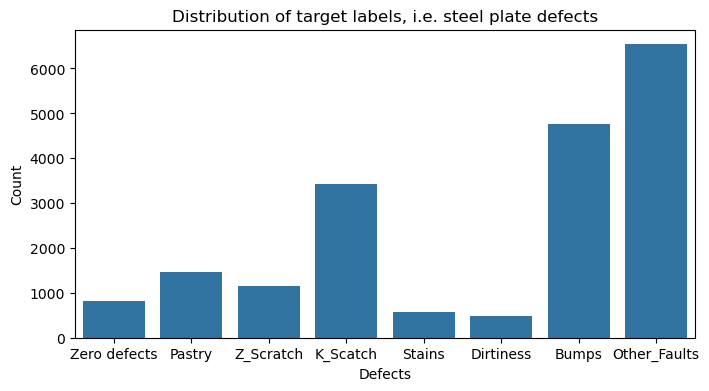

In [15]:
plt.figure(figsize=(8,4));
ax = sns.countplot(x=target_multiclass);
ax.set_xticks(range(len(target_classes)+1));
ax.set_xticklabels(["Zero defects"] + target_classes);

plt.title("Distribution of target labels, i.e. steel plate defects");
plt.xlabel("Defects");
plt.ylabel("Count");

# Features

We look for missing data points in the training and test datasets.

In this case, fortunately, there are no missing data. This makes life significantly easier and allows us to focus on the machine learning problem at hand, rather than figuring out what to do with the missing data.

Unfortunately, in real life, this will generally not be the case so we need strategies in place to deal with the missing data. It is important to understand the significance of the missing data, as there may be reasons for those data to be missing that have relevance to the outcome we're testing for. In the case of missing data, we have several options at our disposal:
* **Fill in the median value** in all the missing entries in the case of *numeric data*. This allows the model to train in cases where the model does not take care of missing values itself. The responsibility of providing data for inference is then shifted to the other variables. This method needs to be used with caution and the results appraised, as it may adversely affect model performance. It is, however, a common way of dealing with missing data.
* **Create a "null" category** in the case of  *categorical data*. This treats missing data as a category in an of itself and enables that characteristic to be used in prediction.
* **Model-specific ways** of dealing with missing data. E.g. both the random forests algorithm and XGBoost have specific ways of filling in missing data bases on feature variables that are present. If the model works well, this can be used to possibly provide more accurate data to train with.

In [17]:
train_df.isnull().sum()

id                       0
X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
dtype: int64

In [18]:
test_df.isnull().sum()

id                       0
X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
dtype: int64

## Types of data

In [19]:
# We look at the datatypes to get an idea of what we're working with
train_df.dtypes

id                         int64
X_Minimum                  int64
X_Maximum                  int64
Y_Minimum                  int64
Y_Maximum                  int64
Pixels_Areas               int64
X_Perimeter                int64
Y_Perimeter                int64
Sum_of_Luminosity          int64
Minimum_of_Luminosity      int64
Maximum_of_Luminosity      int64
Length_of_Conveyer         int64
TypeOfSteel_A300           int64
TypeOfSteel_A400           int64
Steel_Plate_Thickness      int64
Edges_Index              float64
Empty_Index              float64
Square_Index             float64
Outside_X_Index          float64
Edges_X_Index            float64
Edges_Y_Index            float64
Outside_Global_Index     float64
LogOfAreas               float64
Log_X_Index              float64
Log_Y_Index              float64
Orientation_Index        float64
Luminosity_Index         float64
SigmoidOfAreas           float64
Pastry                     int64
Z_Scratch                  int64
K_Scatch  

Cardinality: note that both the "type of steel" categories are binary, 
so we'll treat them as categorical and the rest as continuous
"Outside_global_index" has only 4 values so we'll treat that as a categorical as well

In [20]:
train_df.nunique()

id                       19219
X_Minimum                 1191
X_Maximum                 1259
Y_Minimum                 3345
Y_Maximum                 3341
Pixels_Areas              1154
X_Perimeter                460
Y_Perimeter                331
Sum_of_Luminosity         2595
Minimum_of_Luminosity      162
Maximum_of_Luminosity       98
Length_of_Conveyer          99
TypeOfSteel_A300             2
TypeOfSteel_A400             2
Steel_Plate_Thickness       27
Edges_Index               1849
Empty_Index               1748
Square_Index              1118
Outside_X_Index            525
Edges_X_Index             1102
Edges_Y_Index              900
Outside_Global_Index         4
LogOfAreas                1072
Log_X_Index                206
Log_Y_Index                241
Orientation_Index         1598
Luminosity_Index          2046
SigmoidOfAreas             467
Pastry                       2
Z_Scratch                    2
K_Scatch                     2
Stains                       2
Dirtines

In [21]:
# Checking the test set as well
test_df.nunique()

id                       12814
X_Minimum                 1131
X_Maximum                 1188
Y_Minimum                 2781
Y_Maximum                 2827
Pixels_Areas              1070
X_Perimeter                435
Y_Perimeter                316
Sum_of_Luminosity         2300
Minimum_of_Luminosity      161
Maximum_of_Luminosity       99
Length_of_Conveyer          92
TypeOfSteel_A300             2
TypeOfSteel_A400             2
Steel_Plate_Thickness       24
Edges_Index               1697
Empty_Index               1606
Square_Index               987
Outside_X_Index            480
Edges_X_Index              998
Edges_Y_Index              788
Outside_Global_Index         3
LogOfAreas                 994
Log_X_Index                189
Log_Y_Index                218
Orientation_Index         1382
Luminosity_Index          1887
SigmoidOfAreas             427
dtype: int64

## Feature engineering

For this competition I didn't do much feature engineering. It does come at the risk of potential data loss and, reading the forums where other people described their results, it didn't seem to improve performance of the models that much.

If we did decide to do feature engineering, we have some options, most of these from [this notebook](https://www.kaggle.com/code/lucamassaron/steel-plate-eda-xgboost-is-all-you-need):
* **Calculating the X and Y ranges** (X_max - X-min and y-max - y_min). This would give us a better idea of the size
* **Size ratio**: calculate the ratio of the size of the defect to the perimeter. This describes how compact the defect is and that would likely be different for different types of defects
* **Luminosity range**: The difference in min and max luminosity, also something that may differ in differnt types of defects*
* **Dropping the entries with two targets** Many participants in the competition did this. Because the number of these entries were small (22), they were not that significant. This datasets was artificially generated, so this could be "artifact". This makes training significantly easier and faster, as this is now a multiclass problem rather than a multilabel problem
* Converting entries with two targets to one target by **dropping "Other faults" as the second label**. Makes training easier for the same reasons as above.
* **Normalising the continuous variables**: makes training on GPU's faster. This is not that crucial in training one model at a time, as the models don't take that long to train (Almost all of these models could train within 5 minues, many only took a few seconds). However, whene we do hyperparameter optimisation we can train the models hundreds of times, saving time and compute here becomes more important.

* **Dropping feature that score low on feature importance**. After training, some features don't seem to contribute much to the predictions, so we can consider dropping them from the model. This can be particularly useful in datasets with a very large number of features.

## Preparing the data for training

In [22]:
categorical = ['TypeOfSteel_A300', 'TypeOfSteel_A400', 'Outside_Global_Index']
numerical = list(set(train_df.columns) - set(categorical) - set(target_classes))
numerical.remove('id')

In [24]:
numerical, categorical

(['Luminosity_Index',
  'Y_Perimeter',
  'Sum_of_Luminosity',
  'Edges_Y_Index',
  'Edges_Index',
  'Y_Minimum',
  'X_Maximum',
  'Edges_X_Index',
  'SigmoidOfAreas',
  'Pixels_Areas',
  'Square_Index',
  'Y_Maximum',
  'Log_Y_Index',
  'Orientation_Index',
  'Steel_Plate_Thickness',
  'LogOfAreas',
  'Log_X_Index',
  'Maximum_of_Luminosity',
  'X_Perimeter',
  'Outside_X_Index',
  'Empty_Index',
  'X_Minimum',
  'Length_of_Conveyer',
  'Minimum_of_Luminosity'],
 ['TypeOfSteel_A300', 'TypeOfSteel_A400', 'Outside_Global_Index'])

Here we need to be conscious of how we validate our models with data that hasn't been used in training. I will approach this problem in the following way 

* **Separate a test set** from the training data that I myself will test the models with. This is not the "test_df" data that comes from the separate test.csv file -- that is the unlabelled test data that needs to be used for inference and the predictions sent to Kaggle for scoring
* Use **n-fold stratified cross-validation** for the *XGBoost and random forest* algorithms
* Use FastAI's **built in training/validation segretation** during training to validate the *neural nets*

In [27]:
X_train, X_test, y_train, y_test = train_test_split(train_df.drop(target_classes + ['id'], axis=1), 
                                                    targets_df, test_size=0.1, random_state=40)

## Preparing data for SKLearn API

In [28]:
X = pd.get_dummies(X_train, columns=categorical)
X.T

,16105,14399,17797,15957,5096,324,15749,87,10274,15893,...,15178,7839,3603,12914,5959,11532,16065,14501,14555,11590
X_Minimum,34,1101,1260,824,41,1065,547,489,505,1586,...,41,1167,507,1573,294,517,41,74,1609,373
X_Maximum,75,1116,1271,837,218,1079,588,494,515,1598,...,220,1192,517,1591,340,534,214,95,1620,386
Y_Minimum,2729960,2691161,2837245,2613123,1669152,1299250,1048818,1123524,781434,1658945,...,374730,1997356,419960,643180,4383724,1148345,1327718,2829623,74512,414919
Y_Maximum,2729972,2691189,2837268,2613138,1669220,1299257,1048832,1123540,781444,1658959,...,374925,1997506,419973,643193,4383776,1148364,1327750,2829653,74519,414931
Pixels_Areas,1030,155,81,194,6176,265,543,135,59,167,...,15937,463,87,125,170,82,6277,1804,55,118
X_Perimeter,72,14,12,25,256,20,46,17,12,20,...,558,21,17,17,37,28,214,239,12,13
Y_Perimeter,77,17,18,25,125,21,35,11,10,18,...,416,57,14,12,17,21,131,202,11,14
Sum_of_Luminosity,91488,14536,9347,17388,639433,26683,58157,12235,7104,14536,...,1847157,53525,9522,11979,21548,11425,688430,19453,7114,13345
Minimum_of_Luminosity,78,91,89,102,36,89,86,80,113,86,...,31,107,84,79,115,110,43,72,79,84
Maximum_of_Luminosity,116,121,126,127,126,118,126,132,135,124,...,141,126,126,118,135,140,124,124,101,127


In [29]:
y = y_train
y

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
16105,0,0,0,0,0,0,1
14399,0,0,0,0,0,0,1
17797,0,0,0,0,0,1,0
15957,0,0,0,0,0,1,0
5096,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
11532,0,0,0,0,0,1,0
16065,0,0,1,0,0,0,0
14501,0,1,0,0,0,0,0
14555,0,0,0,0,0,0,1


X_t and y_t are the SciKitLearn-API friendly versions of our testing set

In [31]:
X_t = pd.get_dummies(X_test, columns=categorical)
# None of the entries in the test data had Outside_Global_Index as 0.7 so I had to add that
X_t.insert(len(X_t.columns)-1, 'Outside_Global_Index_0.7', 0)
y_t = y_test

We are now ready to train our models, here I tried
* [XGBoost with Optune for optimisation of hyperparameters](https://github.com/carljvh6/Kaggle/blob/main/Steel_plate_defects/2_XGBoost_Optuna.ipynb)
* [Random Forests](https://github.com/carljvh6/Kaggle/blob/main/Steel_plate_defects/3_Random_forests.ipynb)
* [Neural nets usint FasAI API on Pytorch](https://github.com/carljvh6/Kaggle/blob/main/Steel_plate_defects/4_Neural_nets.ipynb)